In [1]:
import numpy as np
import pandas as pd
from sklearn import *

In [6]:
data = np.loadtxt('./clase3v2.csv', delimiter = ';')

## Ejercicio 1
Crear una función que remueva filas y columnas con NaNs.

In [7]:
def remove_nan_row(data):
    d = data[~np.isnan(data).any(axis=1), :]
    return d

def remove_nan_col(data):
    d = data[:,~np.isnan(data).any(axis=0)]
    return d

In [8]:
d = remove_nan_row(data)
d.shape

(75, 7)

## Ejercicio 2
Crear una función que reemplace NaN por la media y otra con la mediana de la columna.

In [9]:
np.nanmean(data, axis=0)

array([ 2.27198551,  1.28481564,  4.18456924,  1.10395579, -0.63116864,
       -3.83479401,  1.5093118 ])

In [10]:
np.nanmean(data, axis=0)[1]

1.2848156449044055

In [11]:
np.nanmedian(data, axis=0)

array([ 2.40876595,  1.17641014,  4.24622559,  0.9686455 , -0.51066842,
       -3.67513683,  0.99934021])

In [12]:
def nan_2_mean(data):
    d = np.nan_to_num(data, nan=np.nanmean(data, axis=0))
    return d

def nan_2_median(data):
    d = np.nan_to_num(data, nan=np.nanmedian(data, axis=0))
    return d

In [13]:
data_2 = nan_2_mean(data)

In [14]:
data_3 = nan_2_median(data)

## Ejercicio 3
Crear una función que separe los datos en train-validation-test 70-20-10

Hints:
- Usar Indexing y slicing
- Usar np.random.[...]

In [15]:
permuted_idxs = np.random.permutation(data.shape[0])
permuted_idxs

array([ 7, 80,  9, 79, 27, 15, 24, 43, 57, 25, 30,  6, 21, 68, 76, 34, 91,
       92, 37, 26, 81,  1, 85, 13,  8, 58, 38, 74, 78, 41, 22, 63, 46, 93,
       19, 90, 96, 16, 48, 61, 29, 54, 39, 66, 31, 65, 71, 70, 73, 36, 84,
       32, 75, 55, 60, 14, 44, 89, 10, 47, 97,  2, 53,  5, 82, 77, 88, 86,
       64,  0, 40, 49, 72, 95, 56, 45, 33, 69, 99, 52, 28, 83, 94, 42, 18,
       11, 59, 50,  3, 12, 20, 35, 51, 87,  4, 17, 67, 62, 98, 23])

In [16]:
def data_split(data):
    permuted_idxs = np.random.permutation(data.shape[0])
    
    train_idxs = permuted_idxs[0:int(0.7*data.shape[0])]
    valid_idxs = permuted_idxs[int(0.7*data.shape[0]):int(0.9*data.shape[0])]
    test_idxs = permuted_idxs[int(0.9*data.shape[0]):]
    
    train = data[train_idxs]
    validation = data[valid_idxs]
    test = data[test_idxs]
    
    return train, validation, test

In [17]:
data_2 = nan_2_mean(data)
[d_train, d_validation, d_test] = data_split(data_2)
d_test

array([[ 1.27923037e+01,  2.63926665e-01,  1.47011983e+00,
         1.33154410e+00, -8.26593417e-01, -1.27462903e+01,
         4.65997220e+01],
       [ 4.03131335e+00, -2.08152178e+00,  8.13846363e+00,
         5.89898612e-01,  4.30003861e+00, -4.06920510e+00,
         7.58814538e+00],
       [-1.17996764e+01, -2.96181257e+00,  4.18456924e+00,
         7.79812158e-01, -6.31168642e-01, -3.84657357e+00,
        -6.69284721e+01],
       [ 7.56164542e-01,  4.72318979e+00, -5.24313642e+00,
         1.85263172e+00, -1.44646454e+00, -1.43967087e+01,
        -8.31158048e+00],
       [ 1.35050014e+01,  4.48233023e+00,  4.18456924e+00,
         7.70768990e-01, -6.31168642e-01, -3.70628655e+00,
         3.28668978e+01],
       [ 1.00428869e+01,  3.60495782e+00, -3.57453415e-01,
         1.86634141e+00, -2.12225063e+00,  7.11449615e+00,
         3.72134686e+01],
       [ 1.00529212e+01,  1.29243501e+00,  8.09346887e+00,
         2.53671387e+00, -2.04431239e+00, -3.79702115e+00,
         3.4108743

# Ejercicio 4

Tomar una matrix numpy y agregarle **una columna y una fila** de 1's

Puede usar 

$$
  A =
  \left[ {\begin{array}{ccc}
    -2 & -4 & 2 \\
    -2 & 1 & 2 \\
    4 & 2 & 5 \\
  \end{array} } \right]
$$


In [18]:
a = np.array([[-2, -4, 2], [-2, 1, 2], [4, 2, 5], [7, -3, 8]])
a

array([[-2, -4,  2],
       [-2,  1,  2],
       [ 4,  2,  5],
       [ 7, -3,  8]])

In [19]:
def add_ones_col(a):
    b = np.ones((a.shape[0],1))
    d = np.hstack((a,b))
    return d

def add_ones_row(a):
    b = np.ones((1,a.shape[1]))
    d = np.vstack((a,b))
    return d

In [20]:
e = add_ones_row(a)
e = add_ones_col(e)
e

array([[-2., -4.,  2.,  1.],
       [-2.,  1.,  2.,  1.],
       [ 4.,  2.,  5.,  1.],
       [ 7., -3.,  8.,  1.],
       [ 1.,  1.,  1.,  1.]])

## Ejercicio 5

Implementar la función regresión lineal **sin término independiente**. 

Considerar el caso en que $X^TX$ no sea invertible. 

In [41]:
def regresion_lineal(x,y):
    #try:
    #    x_inv = np.linalg.inv(x.T @ x)
    #except LinAlgError:
    #    print("Falló al calcular la inversa de la matriz.")
    # pinv computes pseudo-inverse using Moore-Penrose algorithm, never gives error
    x_inv = np.linalg.pinv(x.T @ x)
    w = x_inv @ x.T @ y
    return w

## Ejercicio 6

Fittear la regresión lineal a los datos cargados. 

In [46]:
d = remove_nan_row(data)
d.shape
x = d[:,:6]
y = d[:,6]
w = regresion_lineal(x,y)

In [47]:
w

array([ 2.92087295,  1.05361921, -0.1798967 ,  3.09946355,  0.59508417,
        1.3033891 ])

In [48]:
y_predict = np.dot(x, w)
y_predict.shape

(75,)

## Ejercicio 7

Graficar los puntos y la recta ajustada.

In [45]:
from matplotlib import pyplot as plt

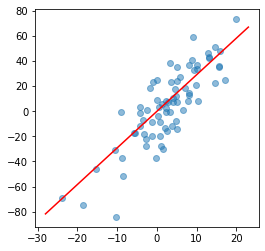

In [64]:
xr = range(int(min(x[:,0]))-5,int(max(x[:,0]))+5)
rect_0 = w[0]*xr

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x[:,0], y, alpha=0.5)
ax.plot(xr,rect_0, c='red')

## Ejercicio 8

Repetir el ajuste anterior utilizando la regresión lineal de sklearn.